# Surprise-Housing

Surprise Housing is a US based company wants to enter the Australian market. The company uses the data analytics to buy properties at low prices and sell at high prices. So company has collected the data and want to know the important or influential variables of the data, so that they can build strategies on them.

In [1]:
# importing the requisite libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## 1.1 Simple Linear Regression

In [2]:
# Reading the dataset

real=pd.read_csv(r"SurpriseHousing.csv")

In [3]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
real.shape

(1460, 81)

In [5]:
real.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
real = real.rename(columns={'1stFlrSF': 'FirstFlrSF', '2ndFlrSF': 'SecondFlrSF'})

In [7]:
real.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FirstFlrSF', 'SecondFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Paved

In [8]:
real_num=real.select_dtypes(exclude=['object'])

cols=real_num.columns
real_num[cols]=real_num[cols].apply(pd.to_numeric, errors='coerce')
print(real_num[cols])

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       1

In [9]:
real_num.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
FirstFlrSF         int64
SecondFlrSF        int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [10]:
real[cols]=real_num[cols]

In [11]:
real.select_dtypes(exclude=['object']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
display(real.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
real_nan=real[real.columns[real.isna().any()]]

In [14]:
real_nan

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [15]:
real_nan.isnull().sum()/len(real_nan)*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [16]:
real_nan.dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

So the columns having null values more thsn 30% can be deleted and other columns are dealt with traditional method.

In [17]:
# Remove those 'real _nan' dataframe columns from dataframe 'real' 
real.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis='columns',inplace=True)

In [18]:
real

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [19]:
real['LotFrontage']=real.LotFrontage.fillna(real.LotFrontage.mean())

In [20]:
real.LotFrontage.isna().sum()

0

In [21]:
real.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [22]:
real = real[real.columns[real.notna().any()]]

In [23]:
real.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [24]:
real.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'O

In [25]:
real.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [26]:
real.isnull().sum().sum()

609

In [27]:
len(real)

1460

In [28]:
perc=(609/1460)*100
print(perc)

41.71232876712329


In [29]:
real.columns[real.isna().any()].tolist()

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [30]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
for i in real.columns:
    if real[i].dtype ==object:
        real = real.fillna(real[i].value_counts().index[0])        

In [31]:
real.isnull().sum().sum()

0

In [32]:
real=real.dropna()

### Correlation

In [33]:
# correlation matrix
cor_real = real.corr()
cor_real

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.005968,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.215828,0.043340,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


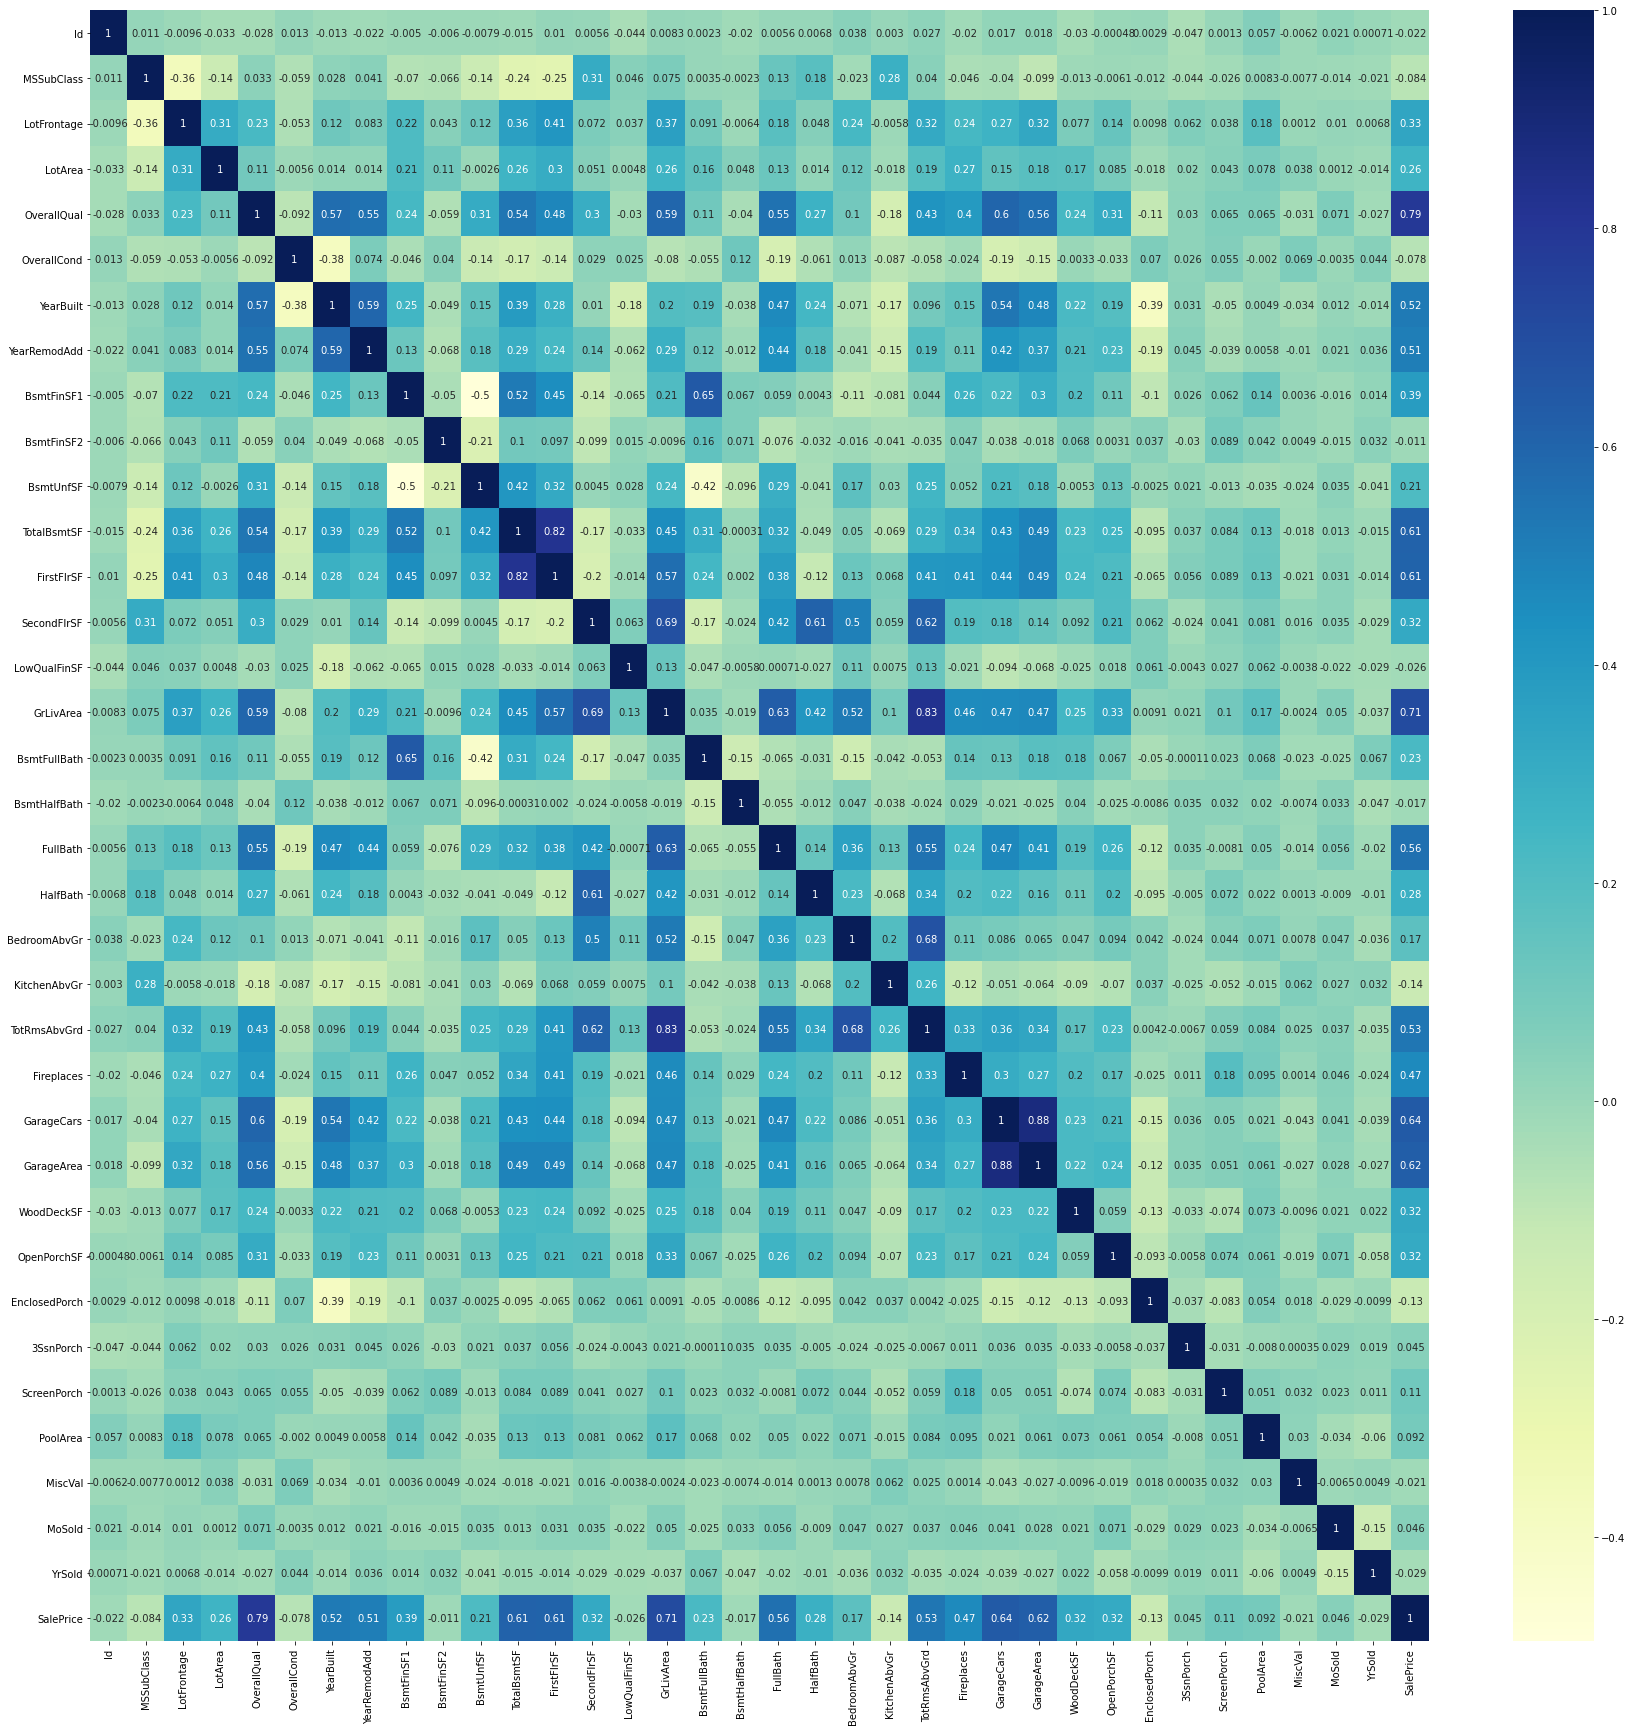

In [34]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,30))

# heatmap
sns.heatmap(cor_real, cmap="YlGnBu", annot=True)
plt.show()

In [35]:
real_non_object = real.select_dtypes(exclude=['object'])

In [36]:
real_non_object.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  FirstFlrSF     1460 non-null   int64  
 13  SecondFlrSF    1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [37]:
real_non_object = real_non_object.loc[:, real_non_object.columns != 'Id']

In [38]:
real_non_object.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


### Dealing with outliers using quantiles

In [39]:
low = .05
high = .95
quant_real_non = real_non_object.quantile([low, high])
print(quant_real_non)

      MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0.05        20.0        35.95   3311.70          4.0          4.0     1916.0   
0.95       160.0       104.00  17401.15          8.0          8.0     2007.0   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  WoodDeckSF  \
0.05        1950.0         0.0         0.0        0.0  ...         0.0   
0.95        2007.0      1274.0       396.2     1468.0  ...       335.0   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0.05         0.00           0.00        0.0          0.0       0.0      0.0   
0.95       175.05         180.15        0.0        160.0       0.0      0.0   

      MoSold  YrSold  SalePrice  
0.05     2.0  2006.0    88000.0  
0.95    11.0  2010.0   326100.0  

[2 rows x 35 columns]


In [40]:
real_non_object = real_non_object.apply(lambda x: x[(x>quant_real_non.loc[low,x.name]) | 
                                    (x<quant_real_non.loc[high,x.name])], axis=0)

In [41]:
real_non_object = pd.concat([real.loc[:,'Id'], real_non_object], axis=1)

In [42]:
real_non_object.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [43]:
real_non_object.isnull().sum()/len(real_non_object)*100

Id                0.000000
MSSubClass        0.000000
LotFrontage       0.000000
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
FirstFlrSF        0.000000
SecondFlrSF       0.000000
LowQualFinSF     98.219178
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr     95.342466
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch        98.356164
ScreenPorch       0.000000
PoolArea         99.520548
MiscVal          96.438356
MoSold            0.000000
YrSold            0.000000
SalePrice         0.000000
dtype: float64

As we can see thare are more than 95% of null values in the columns, so we decide to remove those columns.

In [44]:
real_non_object.drop(['LowQualFinSF','KitchenAbvGr','3SsnPorch','PoolArea','MiscVal'],axis='columns',inplace=True)

In [45]:
real_non_object.isnull().sum()/len(real_non_object)*100

Id               0.0
MSSubClass       0.0
LotFrontage      0.0
LotArea          0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
FirstFlrSF       0.0
SecondFlrSF      0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
ScreenPorch      0.0
MoSold           0.0
YrSold           0.0
SalePrice        0.0
dtype: float64

In [46]:
real_non_object.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,706,0,...,0,2,548,0,61,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,978,0,...,1,2,460,298,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,486,0,...,1,2,608,0,42,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,216,0,...,1,3,642,0,35,272,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,655,0,...,1,3,836,192,84,0,0,12,2008,250000


In [47]:
real_non_object.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
0,1,60,65.000000,8450,7,5,2003,2003,706,0,...,0,2,548,0,61,0,0,2,2008,208500
1,2,20,80.000000,9600,6,8,1976,1976,978,0,...,1,2,460,298,0,0,0,5,2007,181500
2,3,60,68.000000,11250,7,5,2001,2002,486,0,...,1,2,608,0,42,0,0,9,2008,223500
3,4,70,60.000000,9550,7,5,1915,1970,216,0,...,1,3,642,0,35,272,0,2,2006,140000
4,5,60,84.000000,14260,8,5,2000,2000,655,0,...,1,3,836,192,84,0,0,12,2008,250000
5,6,50,85.000000,14115,5,5,1993,1995,732,0,...,0,2,480,40,30,0,0,10,2009,143000
6,7,20,75.000000,10084,8,5,2004,2005,1369,0,...,1,2,636,255,57,0,0,8,2007,307000
7,8,60,70.049958,10382,7,6,1973,1973,859,32,...,2,2,484,235,204,228,0,11,2009,200000
8,9,50,51.000000,6120,7,5,1931,1950,0,0,...,2,2,468,90,0,205,0,4,2008,129900
9,10,190,50.000000,7420,5,6,1939,1950,851,0,...,2,1,205,0,4,0,0,1,2008,118000


In [48]:
real_non_object.iloc[:,1]

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64

In [49]:
real_non_object.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
FirstFlrSF         int64
SecondFlrSF        int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
ScreenPorch        int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [50]:
len(real_non_object.columns)

31

In [51]:
real_non_object.shape

(1460, 31)

In [52]:
real_non_object=real_non_object.astype(np.int64)

In [53]:
real_non_object.dtypes

Id               int64
MSSubClass       int64
LotFrontage      int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
FirstFlrSF       int64
SecondFlrSF      int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
ScreenPorch      int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

In [54]:
real_object = real.select_dtypes(include=['object'])
real_object.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,2003,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,Attchd,1976,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,2001,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Detchd,1998,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,Attchd,2000,RFn,TA,TA,Y,WD,Normal


In [55]:
real_object.isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

Looks like there are no null values in these categorical variables.

In [56]:
# we add a column from a real_non_object dataframe and later we use this column as a key to merge both dataframes.

real_object = real_object.join(real_non_object['Id'])

In [57]:
real_object.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,Id
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,Attchd,2003,RFn,TA,TA,Y,WD,Normal,1
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,Attchd,1976,RFn,TA,TA,Y,WD,Normal,2
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,Attchd,2001,RFn,TA,TA,Y,WD,Normal,3
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Detchd,1998,Unf,TA,TA,Y,WD,Abnorml,4
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,Attchd,2000,RFn,TA,TA,Y,WD,Normal,5


In [58]:
real_merge= pd.merge(real_object, real_non_object, on='Id')

In [59]:
real_merge.isnull().sum()/len(real_merge)*100

MSZoning         0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
                ... 
EnclosedPorch    0.0
ScreenPorch      0.0
MoSold           0.0
YrSold           0.0
SalePrice        0.0
Length: 71, dtype: float64

There are no null values exist in the new dataframe "real_merge"

In [60]:
real_col=real_merge.columns.to_list()

Let us see the variables that are useful in meeting our business objectives

## 3. Data Preparation

In [61]:
# split into X and y
X = real_merge.loc[:, real_col[:-1]] # predictors in variable X

y = real_merge['SalePrice'] # response variable in Y



In [62]:
# creating dummy variables for categorical variables

# subset all categorical variables
real_categorical = X.select_dtypes(include=['object'])
real_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,2003,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,Attchd,1976,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,2001,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Detchd,1998,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,Attchd,2000,RFn,TA,TA,Y,WD,Normal


In [63]:
len(real_categorical.columns)

40

In [64]:
lise=list(real_categorical)

In [65]:
lise

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [66]:
samp_1=real_categorical[lise[0:14]]
samp_2=real_categorical[lise[15:31]]
samp_3=real_categorical[lise[32:40]]

In [67]:
samp_1.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg


In [68]:
samp_2.head()

,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual
0,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd
1,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA
2,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd
3,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd
4,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd


In [69]:
samp_3.head()

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,Attchd,2003,RFn,TA,TA,Y,WD,Normal
1,Attchd,1976,RFn,TA,TA,Y,WD,Normal
2,Attchd,2001,RFn,TA,TA,Y,WD,Normal
3,Detchd,1998,Unf,TA,TA,Y,WD,Abnorml
4,Attchd,2000,RFn,TA,TA,Y,WD,Normal


In [70]:
samp_3.dtypes

GarageType       object
GarageYrBlt      object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [71]:
X['MasVnrArea'].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
RL         8
        ... 
244.0      1
748.0      1
234.0      1
731.0      1
510.0      1
Name: MasVnrArea, Length: 328, dtype: int64

In [72]:
X['MasVnrArea']=X['MasVnrArea'].replace({'RL':0})

In [73]:
X['MasVnrArea'].value_counts()

0.0      869
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [74]:
X['GarageYrBlt']=X['GarageYrBlt'].replace({'RL':0})

In [75]:
#real=real['MasVnrArea','GarageYrBlt'].astype(np.int64)
X['MasVnrArea']=pd.to_numeric(X['MasVnrArea'])

X['GarageYrBlt']=pd.to_numeric(X['GarageYrBlt'])

In [76]:
print(X.select_dtypes(exclude=['object']))

      MasVnrArea  GarageYrBlt    Id  MSSubClass  LotFrontage  LotArea  \
0          196.0       2003.0     1          60           65     8450   
1            0.0       1976.0     2          20           80     9600   
2          162.0       2001.0     3          60           68    11250   
3            0.0       1998.0     4          70           60     9550   
4          350.0       2000.0     5          60           84    14260   
...          ...          ...   ...         ...          ...      ...   
1455         0.0       1999.0  1456          60           62     7917   
1456       119.0       1978.0  1457          20           85    13175   
1457         0.0       1941.0  1458          70           66     9042   
1458         0.0       1950.0  1459          20           68     9717   
1459         0.0       1965.0  1460          20           75     9937   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd  ...  TotRmsAbvGrd  \
0               7            5       2003    

In [77]:
X['MasVnrArea']=X['MasVnrArea'].astype(np.int64)
X['GarageYrBlt']=X['GarageYrBlt'].astype(np.int64)

In [78]:
X['GarageYrBlt'].value_counts()

0       81
2005    65
2006    59
2004    53
2003    50
        ..
1933     1
1927     1
1908     1
1906     1
1900     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [79]:
import datetime

today = datetime.date.today()

year = today.year

print(year)

2022


In [80]:
X['Garage_Blt_age']=year-X['GarageYrBlt']

In [81]:
X.drop(['GarageYrBlt'],axis=1,inplace=True)

In [82]:
real_categorical.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageYrBlt      object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [83]:
real_categorical.drop(['MasVnrArea','GarageYrBlt'],axis=1,inplace=True)

In [84]:
real_categorical.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

### Feature Extraction

In [85]:
# convert into dummies - one hot encoding
real_dummies = pd.get_dummies(real_categorical, drop_first=True)
real_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [86]:
# drop categorical variables 
X = X.drop(list(real_categorical.columns), axis=1)

In [87]:
X.head()

,MasVnrArea,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,Garage_Blt_age
0,196,1,60,65,8450,7,5,2003,2003,706,...,0,2,548,0,61,0,0,2,2008,19
1,0,2,20,80,9600,6,8,1976,1976,978,...,1,2,460,298,0,0,0,5,2007,46
2,162,3,60,68,11250,7,5,2001,2002,486,...,1,2,608,0,42,0,0,9,2008,21
3,0,4,70,60,9550,7,5,1915,1970,216,...,1,3,642,0,35,272,0,2,2006,24
4,350,5,60,84,14260,8,5,2000,2000,655,...,1,3,836,192,84,0,0,12,2008,22


In [88]:
# concat dummy variables with X
X = pd.concat([X, real_dummies], axis=1)

In [89]:
X.head()

,MasVnrArea,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,196,1,60,65,8450,7,5,2003,2003,706,...,0,0,0,0,1,0,0,0,1,0
1,0,2,20,80,9600,6,8,1976,1976,978,...,0,0,0,0,1,0,0,0,1,0
2,162,3,60,68,11250,7,5,2001,2002,486,...,0,0,0,0,1,0,0,0,1,0
3,0,4,70,60,9550,7,5,1915,1970,216,...,0,0,0,0,1,0,0,0,0,0
4,350,5,60,84,14260,8,5,2000,2000,655,...,0,0,0,0,1,0,0,0,1,0


In [90]:
X['House_age_in_years']=year-X['YearBuilt']
X['House_remodel_age_in_years']=year-X['YearRemodAdd']

In [91]:
X.drop(['YearBuilt'],axis=1,inplace=True)
X.drop(['YearRemodAdd'],axis=1,inplace=True)

In [92]:
X = X.loc[:, X.columns != 'Id']

In [93]:
X.head()

,MasVnrArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,House_age_in_years,House_remodel_age_in_years
0,196,60,65,8450,7,5,706,0,150,856,...,0,0,1,0,0,0,1,0,19,19
1,0,20,80,9600,6,8,978,0,284,1262,...,0,0,1,0,0,0,1,0,46,46
2,162,60,68,11250,7,5,486,0,434,920,...,0,0,1,0,0,0,1,0,21,20
3,0,70,60,9550,7,5,216,0,540,756,...,0,0,1,0,0,0,0,0,107,52
4,350,60,84,14260,8,5,655,0,490,1145,...,0,0,1,0,0,0,1,0,22,22


In [94]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MasVnrArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'House_age_in_years',
       'House_remodel_age_in_years'],
      dtype='object', length=238)

In [95]:
#y=y.values.reshape(-1,)

In [96]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 2.1 Feature Selection

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Init the transformer
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=10)

# Fit to the training data
rfe.fit(X_train, y_train)

In [ ]:
X_train_r=X_train.iloc[:,rfe.support_]

In [ ]:
X_train_r.shape

In [ ]:
y_train_r=y_train

In [ ]:
y_train_r.shape

In [ ]:
X_test_r=X_test.iloc[:,rfe.support_]

In [ ]:
y_test_r=y_test

## 3. Model Building and Evaluation

### Linear Regression

In [ ]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_r, y_train_r)

In [ ]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
y_pred_train = lm.predict(X_train_r)
y_pred_test = lm.predict(X_test_r)

metric = []
r2_train_lr = r2_score(y_train_r, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test_r, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train_r - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test_r - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train_r, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test_r, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

## Ridge and Lasso Regression

### Ridge Regression

In [ ]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 70, 80, 100, 500, 1000 ]}

In [ ]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_r, y_train_r) 

In [ ]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

In [ ]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_r, y_train_r)
print(ridge.coef_)

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_r)
y_pred_test = ridge.predict(X_test_r)

metric2 = []
r2_train_lr = r2_score(y_train_r, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test_r, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train_r - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test_r - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train_r, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

## Lasso

In [ ]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_r, y_train_r) 

In [ ]:
d = model_cv.best_params_

In [ ]:
# Printing the best hyperparameter alpha
print(d)

In [ ]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =d['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_r, y_train_r) 

In [ ]:
lasso.coef_

In [ ]:
X_train_r.iloc[:,lasso.coef_!=0]

In [ ]:
X_lasso=X_train_r.iloc[:,lasso.coef_!=0]
X_lasso.columns

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_r)
y_pred_test = lasso.predict(X_test_r)

metric3 = []
r2_train_lr = r2_score(y_train_r, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test_r, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train_r - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test_r - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train_r, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test_r, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

In [ ]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

### Lets observe the changes in the coefficients after regularization

In [ ]:
betas = pd.DataFrame(index=X_train_r.columns)

In [ ]:
betas.rows = X_train_r.columns

In [ ]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [ ]:
pd.set_option('display.max_rows', None)
betas.head(68)

### Cross Validation

In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = ridge, X = X_train_r, y = y_train_r, cv = 10)
print("Cross validation of Ridge model = ",cross_validation)
print("Cross validation of Ridge model (in mean) = ",cross_validation.mean())

In [ ]:
cross_validation = cross_val_score(estimator = lasso, X = X_train_r, y = y_train_r, cv = 10)
print("Cross validation of Lasso model = ",cross_validation)
print("Cross validation of Lasso model (in mean) = ",cross_validation.mean())

In [ ]:
cross_validation = cross_val_score(estimator = lm, X = X_train_r, y = y_train_r, cv = 10)
print("Cross validation of Linear model = ",cross_validation)
print("Cross validation of Linear model (in mean) = ",cross_validation.mean())

### Saving the Model

In [ ]:
import pickle
from sklearn.metrics import accuracy_score

#dump information to that file
pickle.dump(ridge,open('model.pkl','wb'))

#load a model
pickle.load(open('model.pkl','rb'))